## VAE using pytorch

### Data exploration

In [2]:
import pandas as pd
import numpy as np
import os


In [3]:
os.chdir(r"D:\Yichen_Guo\YichenG_Code\Yichen-Capstone-Project")
os.getcwd()

'D:\\Yichen_Guo\\YichenG_Code\\Yichen-Capstone-Project'

In [4]:
mRNA = pd.read_csv("Data/HCC-GU/mRNA_Enzy.csv",delimiter=";")
miRNA = pd.read_csv("Data/HCC-GU/miRNA_Enzy.csv",delimiter=";")
score_mat =  pd.read_csv("Data/HCC-GU/Score_mat_Enzy.csv",delimiter=";")
patient_labels = pd.read_csv("Data/HCC-GU/sample_labels.csv",delimiter=";") # 1 indicated patient with HCC and CIRR (39), 0 indicated patients with CIRR (25) 

In [5]:
mRNA.head()

## each row is a liver tissue that extract from the 64 patients (marked in the patient_label)

,A2M,A4GALT,A4GNT,AAAS,AACS,AADAC,AADAT,AANAT,AARS,AASDHPPT,...,ZNF254,ZNF43,ZNF610,ZNF675,ZNF682,ZNF708,ZNF85,ZNF91,ZNF93,ZWILCH
T_001,-0.943365,1.071710,1.071710,0.393936,1.005661,-1.393830,-0.621972,-0.621972,-1.620037,-1.498261,...,1.005661,1.498261,1.393830,0.101446,0.827756,1.393830,0.527832,0.020259,1.218445,-0.670934
T_007,-0.773586,0.670934,0.393936,-1.218445,0.827756,-0.574326,-0.308231,0.183245,1.005661,-1.964241,...,-0.393936,0.721399,0.224533,0.142238,1.393830,0.060807,1.142291,2.269380,0.773586,0.224533
T_013,0.020259,-0.060807,-0.974085,-0.773586,-1.964241,0.943365,0.574326,-0.621972,-0.670934,-1.393830,...,0.308231,-0.101446,0.183245,-1.071710,-0.527832,0.101446,0.884222,0.142238,-0.308231,-0.621972
T_016,-0.621972,-0.350792,-0.183245,0.020259,-0.266171,0.101446,0.670934,1.142291,-1.393830,-0.308231,...,1.142291,-1.071710,-1.301604,0.183245,1.620037,0.266171,-0.574326,1.005661,0.224533,1.620037
T_020,-0.670934,-0.393936,0.266171,0.183245,-0.437756,1.071710,-0.437756,-0.621972,-0.142238,-0.884222,...,1.768555,0.527832,0.482351,0.224533,-0.020259,0.574326,0.393936,1.218445,-0.266171,0.060807


In [6]:
miRNA

## each row is a liver tissue that extract from the 64 patients (marked in the patient_label)

,hsa.let.7a.2.3p,hsa.let.7a.3p,hsa.let.7a.5p,hsa.let.7b.3p,hsa.let.7b.5p,hsa.let.7c.3p,hsa.let.7c.5p,hsa.let.7d.3p,hsa.let.7d.5p,hsa.let.7e.3p,...,hsa.miR.95.3p,hsa.miR.95.5p,hsa.miR.9500,hsa.miR.96.5p,hsa.miR.98.3p,hsa.miR.98.5p,hsa.miR.99a.3p,hsa.miR.99a.5p,hsa.miR.99b.3p,hsa.miR.99b.5p
T_001,1.973054,0.395704,-0.352366,1.400084,0.352366,0.352366,-0.439720,1.223912,0.101901,1.400084,...,-0.576903,-1.223912,-0.020350,0.724636,1.627306,-0.576903,-0.395704,-1.504984,1.147417,0.947598
T_007,-1.973054,0.352366,1.307444,0.020350,0.777057,0.309614,0.439720,0.309614,1.776490,0.831470,...,1.223912,0.309614,-1.042831,1.307444,0.724636,1.776490,0.061080,-0.888189,0.576903,0.439720
T_013,1.010173,0.184067,0.309614,0.439720,0.184067,-0.673945,-0.020350,-0.947598,-0.101901,-0.267365,...,0.061080,-0.061080,1.400084,-0.530201,0.831470,0.624763,-0.439720,-0.439720,-0.225540,-0.530201
T_016,2.279563,-2.279563,-0.225540,-0.309614,-0.395704,-0.576903,0.020350,1.147417,-0.061080,-2.279563,...,-0.624763,-0.439720,-1.042831,-0.831470,-1.223912,-0.831470,-0.888189,-1.147417,-1.504984,-1.504984
T_020,0.673945,-0.184067,-0.267365,-0.888189,-0.576903,-0.225540,-0.184067,-0.624763,-0.624763,-0.309614,...,-0.724636,0.888189,-1.042831,-0.352366,1.307444,0.831470,-0.724636,0.395704,-0.142876,0.225540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
T_086,0.530201,1.223912,1.627306,0.352366,1.504984,1.307444,1.504984,-0.530201,0.777057,1.223912,...,1.400084,0.267365,0.777057,-0.061080,-0.020350,0.267365,1.627306,1.776490,1.307444,1.223912
T_089,-1.307444,-0.484515,0.888189,-0.101901,1.400084,-0.020350,0.888189,0.888189,0.309614,-0.061080,...,0.888189,0.673945,-1.042831,0.184067,-0.777057,-0.184067,0.673945,0.777057,0.888189,0.777057
T_092,-1.076518,-0.309614,1.400084,1.147417,1.776490,0.724636,0.267365,0.777057,1.627306,1.973054,...,1.010173,-1.776490,-0.184067,0.309614,-0.530201,-0.624763,0.484515,1.400084,1.973054,1.973054
T_095,-0.777057,0.724636,1.973054,0.484515,1.973054,1.973054,1.627306,1.010173,1.010173,0.439720,...,1.776490,0.624763,-1.042831,0.061080,-0.673945,-0.225540,1.223912,0.831470,1.627306,1.627306


In [7]:
score_mat

## Domain knowledge
## four confiendence level for mRNA-miRNA associations, 1 for expertimentally observed links, 0.75 for highly predicted, 0.5 for moderately predicveted, and 0 for those neirther observed nor predicted

,hsa.let.7a.2.3p,hsa.let.7a.3p,hsa.let.7a.5p,hsa.let.7b.3p,hsa.let.7b.5p,hsa.let.7c.3p,hsa.let.7c.5p,hsa.let.7d.3p,hsa.let.7d.5p,hsa.let.7e.3p,...,hsa.miR.95.3p,hsa.miR.95.5p,hsa.miR.9500,hsa.miR.96.5p,hsa.miR.98.3p,hsa.miR.98.5p,hsa.miR.99a.3p,hsa.miR.99a.5p,hsa.miR.99b.3p,hsa.miR.99b.5p
A2M,0.0,0.0,0.0,0,0,0.0,0,0.0,0,0.00,...,0.0,0.0,0.0,0,0,0,0.0,0,0,0
A4GALT,0.0,0.0,0.0,0,0,0.0,0,0.0,0,0.00,...,0.0,0.0,0.0,0,0,0,0.0,0,0,0
A4GNT,0.0,0.0,0.0,0,0,0.0,0,0.0,0,0.75,...,0.0,0.0,0.0,0,0,0,0.0,0,0,0
AAAS,0.0,0.0,0.0,0,0,0.0,0,0.0,0,0.00,...,0.0,0.0,0.0,0,0,0,0.0,0,0,0
AACS,0.0,0.0,0.0,0,0,0.0,0,0.0,0,0.00,...,0.0,0.0,0.0,0,0,0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZNF708,0.0,0.0,0.0,0,0,0.0,0,0.0,0,0.00,...,0.0,0.0,0.0,0,0,0,0.0,0,0,0
ZNF85,0.0,0.0,0.0,0,0,0.0,0,0.0,0,0.00,...,0.0,0.0,0.0,0,0,0,0.0,0,0,0
ZNF91,0.0,0.0,0.0,0,0,0.0,0,0.0,0,0.00,...,0.0,0.0,0.0,0,0,0,0.0,0,0,0
ZNF93,0.0,0.0,0.0,0,0,0.0,0,0.0,0,0.00,...,0.0,0.0,0.0,0,0,0,0.0,0,0,0


## building the autoencoder

Based on the performace, the potiential of including supervised classification in to the model?
- To get a better represetntation of the original data?
- known to work for classification problems

In [108]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from torch.utils.data import random_split
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [94]:
class Encoder(nn.Module):
    def __init__(self, input_dim, hidden_dim1, hidden_dim2, z_dim, drop_out=0.5):
        super(Encoder, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim1)
        self.bn1 = nn.BatchNorm1d(hidden_dim1)  # Batch Normalization layer
        self.fc2 = nn.Linear(hidden_dim1, hidden_dim2)
        self.bn2 = nn.BatchNorm1d(hidden_dim2)  # Batch Normalization layer
        self.dropout = nn.Dropout(drop_out) 
        self.fc_mu = nn.Linear(hidden_dim2, z_dim)
        self.fc_log_var = nn.Linear(hidden_dim2, z_dim)
    
    def forward(self, x):
        h = torch.relu(self.bn1(self.fc1(x)))  # Apply Batch Normalization
        h = self.dropout(h)
        h = torch.relu(self.bn2(self.fc2(h)))  # Apply Batch Normalization
        h = self.dropout(h)
        mu = self.fc_mu(h)
        log_var = self.fc_log_var(h)
        return mu, log_var

class Decoder(nn.Module):
    def __init__(self, z_dim, hidden_dim1, hidden_dim2, output_dim, drop_out=0.5):
        super(Decoder, self).__init__()
        self.fc1 = nn.Linear(z_dim, hidden_dim1)
        self.bn1 = nn.BatchNorm1d(hidden_dim1)  # Batch Normalization layer
        self.fc2 = nn.Linear(hidden_dim1, hidden_dim2)
        self.bn2 = nn.BatchNorm1d(hidden_dim2)  # Batch Normalization layer
        self.dropout = nn.Dropout(drop_out) 
        self.fc3 = nn.Linear(hidden_dim2, output_dim)
    
    def forward(self, x):
        h = torch.relu(self.bn1(self.fc1(x)))  # Apply Batch Normalization
        h = self.dropout(h)
        h = torch.relu(self.bn2(self.fc2(h)))  # Apply Batch Normalization
        h = self.dropout(h)
        recon = self.fc3(h) # using linear due to data type, may use sigmoid if want to use this as classification method
        return recon

class VAE(nn.Module):
    def __init__(self, input_dim, hidden_dim1, hidden_dim2, z_dim, drop_out):
        super(VAE, self).__init__()
        self.encoder = Encoder(input_dim, hidden_dim1, hidden_dim2, z_dim, drop_out)
        self.decoder = Decoder(z_dim, hidden_dim1, hidden_dim2, input_dim, drop_out)
    
    def forward(self, x):
        mu, log_var = self.encoder(x)
        std = torch.exp(log_var / 2)
        eps = torch.randn_like(std)
        z = mu + eps * std
        recon = self.decoder(z)
        return recon, mu, log_var

def loss_function(recon_x, x, mu, log_var):
    MSE = nn.functional.mse_loss(recon_x, x, reduction='sum')
    KLD = -0.5 * torch.sum(1 + log_var - mu.pow(2) - log_var.exp())
    return MSE + KLD

### mRNA test

In [105]:
## Parameters
df_train = mRNA
input_dim = df_train.shape[1]
hidden_dim1 = 1024
hidden_dim2 = 512 
z_dim = 128 
learning_rate = 1e-3
num_epochs = 10000 
drop = 0.3

In [109]:
## Prepare and split the data

tensor_train = torch.tensor(df_train.values, dtype=torch.float32)
train_dataset = TensorDataset(tensor_train)


train_size = int(0.8 * len(train_dataset))
val_size = len(train_dataset) - train_size
train_dataset, val_dataset = random_split(train_dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)

best_val_loss = float('inf')
patience = 500  # Number of epochs to wait for improvement before stopping
wait = 0


# Model compile

model = VAE(input_dim, hidden_dim1, hidden_dim2, z_dim, drop_out=drop)
model = model.to('cuda') 

optimizer = optim.Adam(model.parameters(), lr=learning_rate)

val_loss_values = []
train_loss_values = []
train_latents = []
val_latents = []

# Training loop
for epoch in range(num_epochs):
    model.train()
    train_loss = 0  # Initialize training loss
    for batch in train_loader:
        data, = batch
        data = data.to('cuda')
        optimizer.zero_grad()
        recon_batch, mu, log_var = model(data)
        loss = loss_function(recon_batch, data, mu, log_var)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()  # Accumulate the training loss
        train_latents.append(mu.cpu().detach().numpy())
    
    train_loss /= len(train_loader.dataset)  # Compute the average training loss
    train_loss_values.append(train_loss)

    model.eval()
    val_loss = 0
    with torch.no_grad():
        for batch in val_loader:
            data, = batch
            data = data.to('cuda')
            recon_batch, mu, log_var = model(data)
            val_loss += loss_function(recon_batch, data, mu, log_var).item()
            val_latents.append(mu.cpu().detach().numpy())
            
    val_loss /= len(val_loader.dataset)
    val_loss_values.append(val_loss) 
    print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}')
    
    # Check for improvement
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        wait = 0  # Reset wait counter
    else:
        wait += 1
        if wait >= patience:
            print('Early stopping')
            break

Epoch 1/10000, Train Loss: 3783.4740, Validation Loss: 3649.3990
Epoch 2/10000, Train Loss: 3589.5992, Validation Loss: 3514.8104
Epoch 3/10000, Train Loss: 3326.7981, Validation Loss: 3343.2040
Epoch 4/10000, Train Loss: 2963.8792, Validation Loss: 4585.9294
Epoch 5/10000, Train Loss: 2703.0578, Validation Loss: 4074.9183
Epoch 6/10000, Train Loss: 2603.8066, Validation Loss: 3096.3026
Epoch 7/10000, Train Loss: 2468.3022, Validation Loss: 2977.5697
Epoch 8/10000, Train Loss: 2493.7554, Validation Loss: 3030.8582
Epoch 9/10000, Train Loss: 2364.9808, Validation Loss: 2807.5424
Epoch 10/10000, Train Loss: 2354.2321, Validation Loss: 2722.5859
Epoch 11/10000, Train Loss: 2278.8193, Validation Loss: 2768.8528
Epoch 12/10000, Train Loss: 2338.8040, Validation Loss: 2692.6541
Epoch 13/10000, Train Loss: 2240.9632, Validation Loss: 2727.5778
Epoch 14/10000, Train Loss: 2152.4615, Validation Loss: 2724.0216
Epoch 15/10000, Train Loss: 2130.3987, Validation Loss: 2744.2356
Epoch 16/10000, Tra

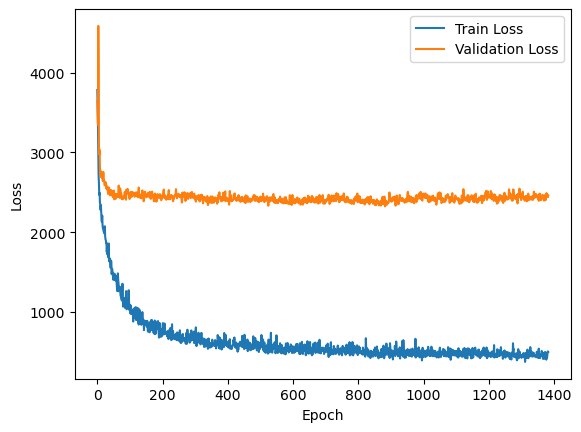

In [110]:
plt.plot(train_loss_values, label='Train Loss')
plt.plot(val_loss_values, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


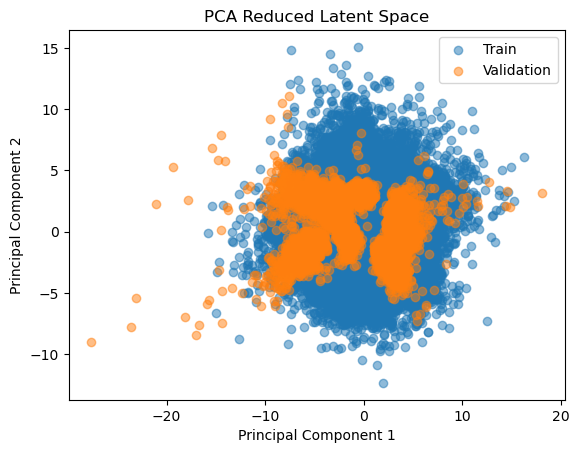

In [111]:
train_latents = np.vstack(train_latents)
val_latents = np.vstack(val_latents)

# Now, use PCA to reduce the dimensionality of the latent space for visualization
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
train_pca = pca.fit_transform(train_latents)
val_pca = pca.transform(val_latents)

# Plotting the PCA reduced latent space
plt.scatter(train_pca[:, 0], train_pca[:, 1], label='Train', alpha=0.5)
plt.scatter(val_pca[:, 0], val_pca[:, 1], label='Validation', alpha=0.5)
plt.legend()
plt.title('PCA Reduced Latent Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

### miRNA test

In [112]:
## Parameters
df_train = miRNA
input_dim = df_train.shape[1]
hidden_dim1 = 1024
hidden_dim2 = 512 
z_dim = 128 
learning_rate = 1e-3
num_epochs = 10000 
drop = 0.3

In [113]:
## Prepare and split the data

tensor_train = torch.tensor(df_train.values, dtype=torch.float32)
train_dataset = TensorDataset(tensor_train)


train_size = int(0.8 * len(train_dataset))
val_size = len(train_dataset) - train_size
train_dataset, val_dataset = random_split(train_dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)

best_val_loss = float('inf')
patience = 500  # Number of epochs to wait for improvement before stopping
wait = 0


# Model compile

model = VAE(input_dim, hidden_dim1, hidden_dim2, z_dim, drop_out=drop)
model = model.to('cuda') 

optimizer = optim.Adam(model.parameters(), lr=learning_rate)

val_loss_values = []
train_loss_values = []
train_latents = []
val_latents = []

# Training loop
for epoch in range(num_epochs):
    model.train()
    train_loss = 0  # Initialize training loss
    for batch in train_loader:
        data, = batch
        data = data.to('cuda')
        optimizer.zero_grad()
        recon_batch, mu, log_var = model(data)
        loss = loss_function(recon_batch, data, mu, log_var)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()  # Accumulate the training loss
        train_latents.append(mu.cpu().detach().numpy())
    
    train_loss /= len(train_loader.dataset)  # Compute the average training loss
    train_loss_values.append(train_loss)

    model.eval()
    val_loss = 0
    with torch.no_grad():
        for batch in val_loader:
            data, = batch
            data = data.to('cuda')
            recon_batch, mu, log_var = model(data)
            val_loss += loss_function(recon_batch, data, mu, log_var).item()
            val_latents.append(mu.cpu().detach().numpy())
            
    val_loss /= len(val_loader.dataset)
    val_loss_values.append(val_loss) 
    print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}')
    
    # Check for improvement
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        wait = 0  # Reset wait counter
    else:
        wait += 1
        if wait >= patience:
            print('Early stopping')
            break

Epoch 1/10000, Train Loss: 2227.2696, Validation Loss: 1851.9141
Epoch 2/10000, Train Loss: 2132.8872, Validation Loss: 1869.2521
Epoch 3/10000, Train Loss: 2092.0767, Validation Loss: 1867.4567
Epoch 4/10000, Train Loss: 2023.4756, Validation Loss: 1844.0146
Epoch 5/10000, Train Loss: 1880.2734, Validation Loss: 1827.6824
Epoch 6/10000, Train Loss: 1786.0869, Validation Loss: 1823.8344
Epoch 7/10000, Train Loss: 1692.2872, Validation Loss: 1795.0236
Epoch 8/10000, Train Loss: 1637.5675, Validation Loss: 1790.4989
Epoch 9/10000, Train Loss: 1577.5450, Validation Loss: 1752.2671
Epoch 10/10000, Train Loss: 1514.9965, Validation Loss: 1733.4898
Epoch 11/10000, Train Loss: 1462.4629, Validation Loss: 1721.9645
Epoch 12/10000, Train Loss: 1408.8568, Validation Loss: 1690.5886
Epoch 13/10000, Train Loss: 1366.3026, Validation Loss: 1701.4760
Epoch 14/10000, Train Loss: 1368.6446, Validation Loss: 1682.9259
Epoch 15/10000, Train Loss: 1346.5836, Validation Loss: 1666.8009
Epoch 16/10000, Tra

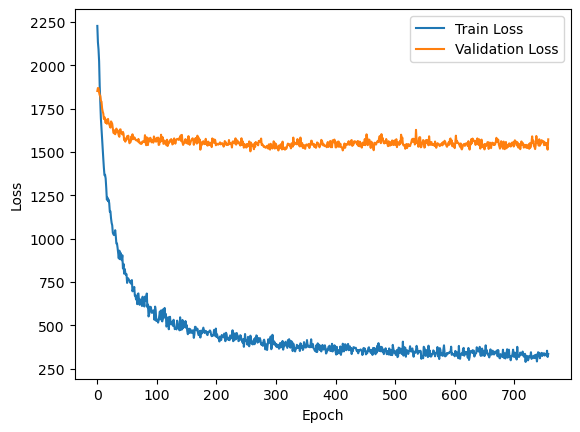

In [114]:
plt.plot(train_loss_values, label='Train Loss')
plt.plot(val_loss_values, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

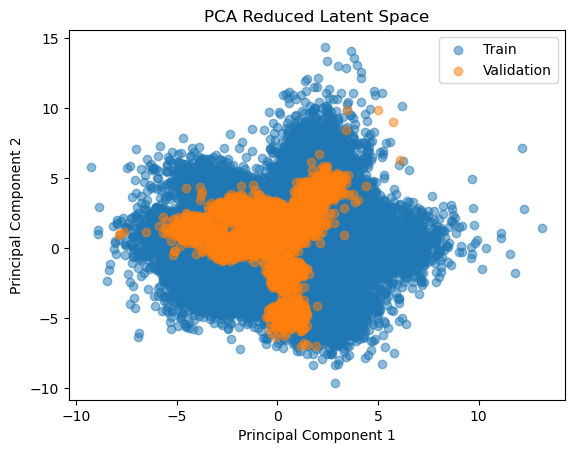

In [115]:
train_latents = np.vstack(train_latents)
val_latents = np.vstack(val_latents)

# Now, use PCA to reduce the dimensionality of the latent space for visualization
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
train_pca = pca.fit_transform(train_latents)
val_pca = pca.transform(val_latents)

# Plotting the PCA reduced latent space
plt.scatter(train_pca[:, 0], train_pca[:, 1], label='Train', alpha=0.5)
plt.scatter(val_pca[:, 0], val_pca[:, 1], label='Validation', alpha=0.5)
plt.legend()
plt.title('PCA Reduced Latent Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

### Joint Feature space